## 1. Load Data

In [2]:
import tensorflow as tf
import os

In [3]:
os.listdir('dataset')

['Aluvial',
 'Andosol',
 'Entisol',
 'Humus',
 'Inceptisol',
 'Kapur',
 'Laterit',
 'Pasir']

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [7]:
data = tf.keras.utils.image_dataset_from_directory('dataset')

Found 880 files belonging to 8 classes.


In [8]:
class_names = data.class_names
print("Class Names:", class_names)

Class Names: ['Aluvial', 'Andosol', 'Entisol', 'Humus', 'Inceptisol', 'Kapur', 'Laterit', 'Pasir']


In [9]:
class_indices = {class_name: index for index, class_name in enumerate(class_names)}
print("Class Indices:", class_indices)

Class Indices: {'Aluvial': 0, 'Andosol': 1, 'Entisol': 2, 'Humus': 3, 'Inceptisol': 4, 'Kapur': 5, 'Laterit': 6, 'Pasir': 7}


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

In [12]:
batch[0].shape

(32, 256, 256, 3)

In [13]:
batch[1]

array([3, 6, 6, 4, 5, 3, 1, 2, 3, 7, 7, 6, 7, 4, 0, 2, 3, 0, 0, 5, 7, 3,
       1, 5, 2, 5, 6, 1, 3, 1, 6, 5])

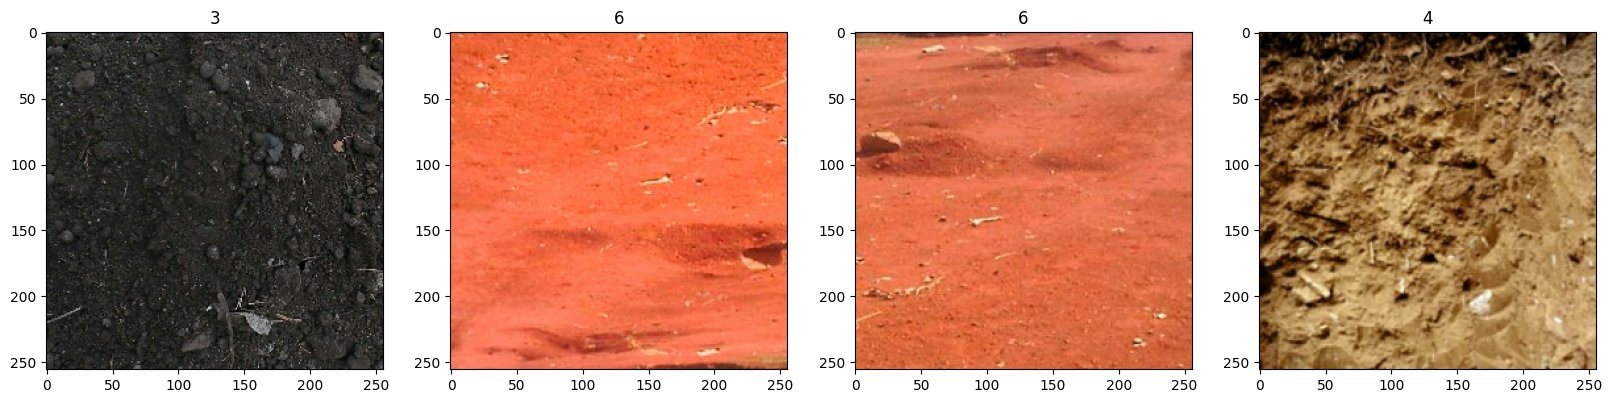

In [14]:
#visualize image label class 0=cat 1=dog
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 2. Preprocessing Data

### 2.1 Scale Data

In [15]:
data = data.map(lambda x, y: (x/255, y))

In [16]:
scaled_iterator = data.as_numpy_iterator()

In [17]:
batch = scaled_iterator.next()

In [18]:
batch[0]

array([[[[8.33559692e-01, 8.33559692e-01, 8.33559692e-01],
         [7.89501667e-01, 7.89501667e-01, 7.89501667e-01],
         [7.60471940e-01, 7.60471940e-01, 7.60471940e-01],
         ...,
         [7.58786082e-01, 7.58786082e-01, 7.58786082e-01],
         [5.63715279e-01, 5.63715279e-01, 5.63715279e-01],
         [7.49764264e-01, 7.49764264e-01, 7.49764264e-01]],

        [[8.82248342e-01, 8.82248342e-01, 8.82248342e-01],
         [8.74455929e-01, 8.74455929e-01, 8.74455929e-01],
         [8.46925557e-01, 8.46925557e-01, 8.46925557e-01],
         ...,
         [7.76384830e-01, 7.76387334e-01, 7.71148384e-01],
         [5.38065851e-01, 5.38065851e-01, 5.38065851e-01],
         [7.18423665e-01, 7.18423665e-01, 7.18423665e-01]],

        [[7.17980623e-01, 7.17980623e-01, 7.17980623e-01],
         [7.50796854e-01, 7.50796854e-01, 7.50796854e-01],
         [6.40777528e-01, 6.40777528e-01, 6.40777528e-01],
         ...,
         [4.22979236e-01, 4.25140798e-01, 4.21608210e-01],
         [

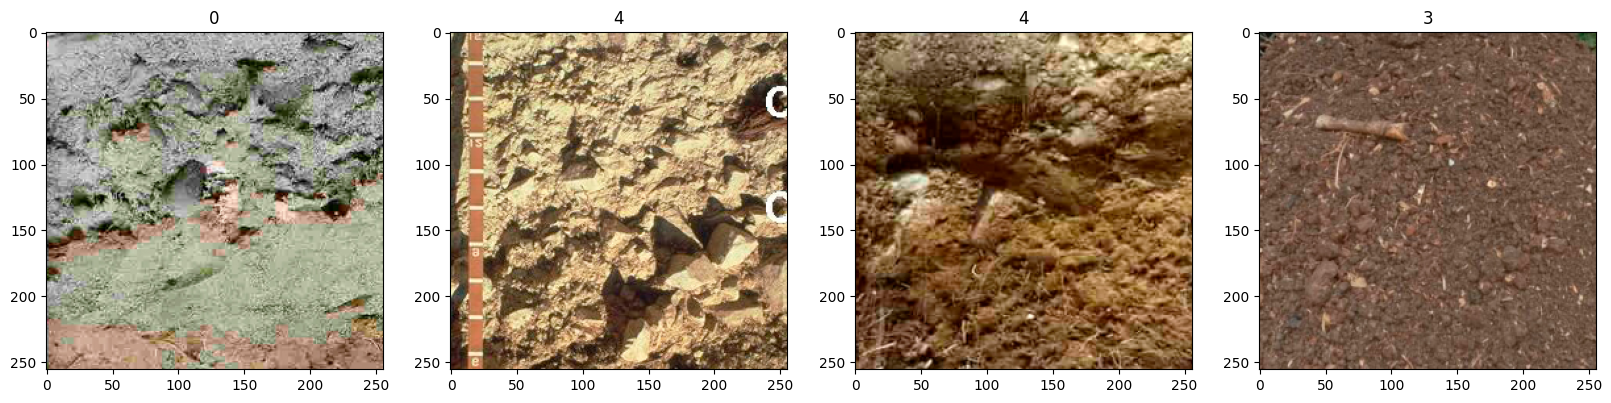

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### 2.2 Split Data

In [20]:
len(data)

28

In [21]:
# Train_size = 3, Val_size = 1, test_size = 1
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) +1
test_size = int(len(data)*.1) +1

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [23]:
len(train), len(val), len(test)

(19, 6, 3)

## 3. CNN Model

### 3.1 Build Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(8, activation='softmax'))

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

### 3.2 Train Model

In [29]:
logdir = 'log'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


19/19 [==============================] - 18s 723ms/step - loss: 1.8113 - accuracy: 0.3059 - val_loss: 1.6252 - val_accuracy: 0.3333
Epoch 2/20
19/19 [==============================] - 11s 529ms/step - loss: 1.4110 - accuracy: 0.4819 - val_loss: 1.4266 - val_accuracy: 0.4635
Epoch 3/20
19/19 [==============================] - 11s 538ms/step - loss: 1.2302 - accuracy: 0.5115 - val_loss: 1.3648 - val_accuracy: 0.5208
Epoch 4/20
19/19 [==============================] - 12s 569ms/step - loss: 1.1750 - accuracy: 0.5724 - val_loss: 1.2510 - val_accuracy: 0.5573
Epoch 5/20
19/19 [==============================] - 12s 574ms/step - loss: 1.0329 - accuracy: 0.6299 - val_loss: 0.9423 - val_accuracy: 0.6719
Epoch 6/20
19/19 [==============================] - 11s 566ms/step - loss: 0.8513 - accuracy: 0.6924 - val_loss: 0.8723 - val_accuracy: 0.7292
Epoch 7/20
19/19 [==============================] - 12s 584ms/step - loss: 0.7458 - accuracy: 0.7401 - val_loss: 0.9306 - val_accuracy: 0.68

In [32]:
hist.history

{'loss': [1.8113186359405518,
  1.4109902381896973,
  1.2301610708236694,
  1.1749663352966309,
  1.0328696966171265,
  0.8512636423110962,
  0.7457756996154785,
  0.6959283351898193,
  0.5734442472457886,
  0.5216239094734192,
  0.4904136657714844,
  0.4080904722213745,
  0.33121761679649353,
  0.23325014114379883,
  0.31041979789733887,
  0.5151510834693909,
  0.2511703670024872,
  0.2378687560558319,
  0.21441976726055145,
  0.16900590062141418],
 'accuracy': [0.3059210479259491,
  0.4819079041481018,
  0.5115131735801697,
  0.5723684430122375,
  0.6299341917037964,
  0.6924341917037964,
  0.7401315569877625,
  0.7631579041481018,
  0.7894737124443054,
  0.8240131735801697,
  0.84375,
  0.8585526347160339,
  0.8898026347160339,
  0.9210526347160339,
  0.90625,
  0.8273026347160339,
  0.9243420958518982,
  0.9111841917037964,
  0.9342105388641357,
  0.9490131735801697],
 'val_loss': [1.6251882314682007,
  1.4266005754470825,
  1.3648449182510376,
  1.2509582042694092,
  0.94228821992

## 4. Evaluate Performance

### 4.1 Plot Performance

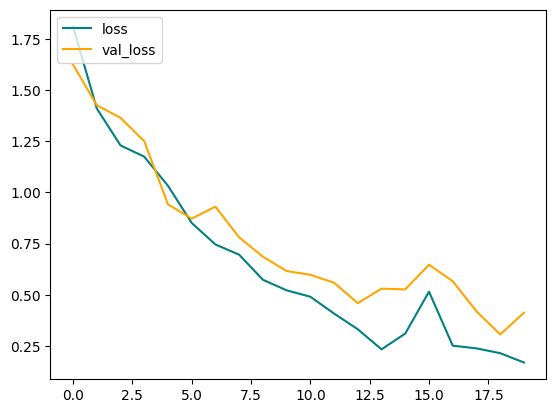

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.legend(loc='upper left')
plt.show()

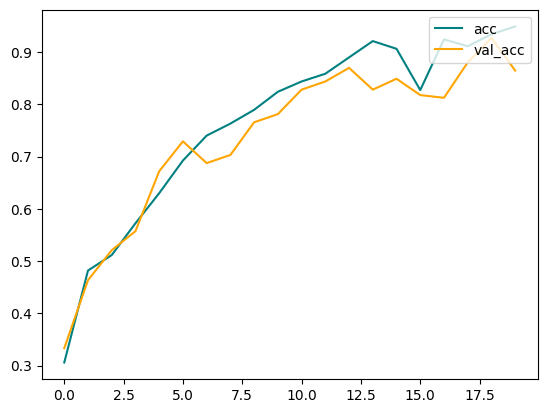

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='acc')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_acc')
plt.legend(loc='upper right')
plt.show()

### 4.2 Test

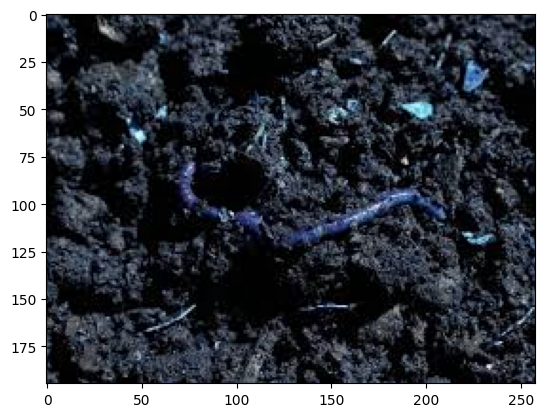

In [89]:
import cv2
import imghdr
img = cv2.imread('Humus_test.jpeg')
plt.imshow(img)
plt.show()

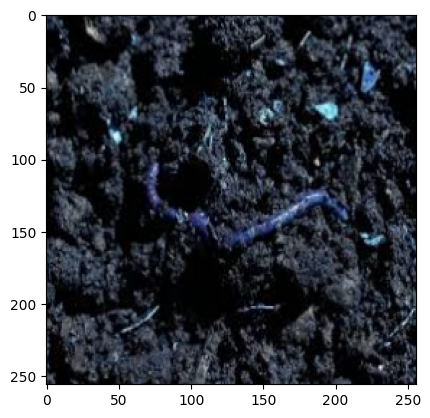

In [90]:
resize = tf.image.resize(img, (256,256,))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [91]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 24ms/step


In [92]:
np.argmax(yhat)

3

In [93]:
if np.argmax(yhat) == 0:
    print(f'Predicted class is Aluvial')
elif np.argmax(yhat) == 1:
    print(f'Predicted class is "Andosol')
elif np.argmax(yhat) == 2:
    print(f'Predicted class is "Entisol')
elif np.argmax(yhat) == 3:
    print(f'Predicted class is "Humus')
elif np.argmax(yhat) == 4:
    print(f'Predicted class is "Inceptisol')
elif np.argmax(yhat) == 5:
    print(f'Predicted class is "Kapur')
elif np.argmax(yhat) == 6:
    print(f'Predicted class is "Laterit')
elif np.argmax(yhat) == 7:
    print(f'Predicted class is "Pasir')

Predicted class is "Humus


## 5. Save Model

In [94]:
model.save(os.path.join('models', 'model.h5'))

C:\Users\MSI GF63\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [95]:
model.save(os.path.join('models', 'model.json'))

INFO:tensorflow:Assets written to: models\model.json\assets


INFO:tensorflow:Assets written to: models\model.json\assets
